In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('monthly-sunspots.csv')

In [ ]:
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


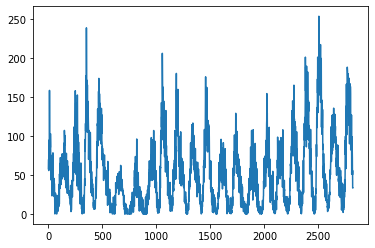

In [ ]:
df['Sunspots'].plot()

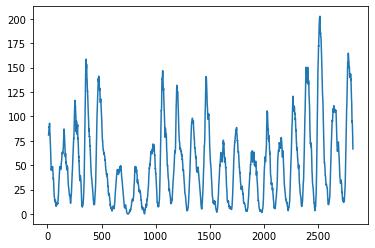

In [ ]:
df['Sunspots'].rolling(12).mean().plot()

In [ ]:
sun_tr = df['Sunspots'].rolling(12).mean()[:2750]
sun_te = df['Sunspots'].rolling(12).mean()[2750:]

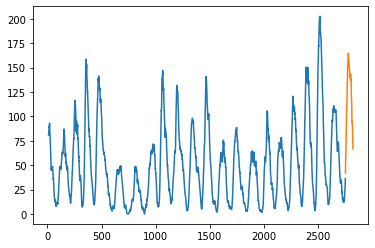

In [ ]:
sun_tr.plot()
sun_te.plot()

Vou fazer uma busca simples baseada em ED

In [ ]:
def ed(x,y):
    return np.sum(np.square(x-y))

def busca(q, r):

    ql = q.shape[0]
    rl = r.shape[0]

    min_dist = np.inf
    min_pos = -1

    #jeito mais custoso
    for i in range(rl-ql):
        this_dist = ed(q, r[i:i+ql])
        if (min_dist > this_dist):
            min_dist = this_dist
            min_pos = i
    
    return min_pos, min_dist

In [ ]:
min_pos, min_dist = busca(sun_te.to_numpy(), sun_tr.to_numpy())

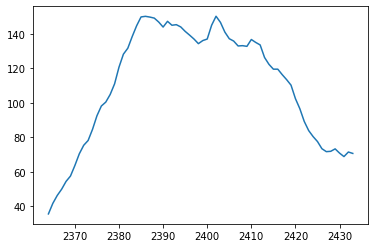

In [ ]:
sun_tr[min_pos:min_pos+sun_te.shape[0]].plot()

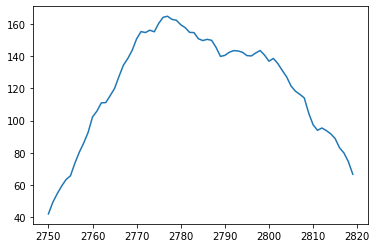

In [ ]:
sun_te.plot()

Teste de forecasting

In [ ]:
sun_val = sun_tr[-120:]
sun_tr = sun_tr[:-120]

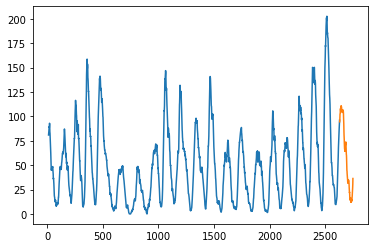

In [ ]:
sun_tr.plot()
sun_val.plot()

In [ ]:
min_pos, min_dist = busca(sun_val.to_numpy(), sun_tr.to_numpy())

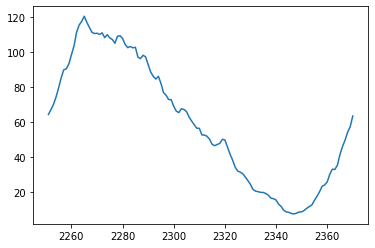

In [ ]:
sun_tr[min_pos:min_pos+sun_val.shape[0]].plot() # se parece com a query

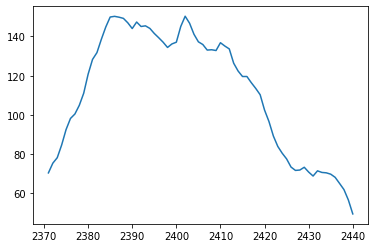

In [ ]:
sun_tr[min_pos+sun_val.shape[0]:min_pos+sun_val.shape[0]+sun_te.shape[0]].plot() # quais seriam os próximos valores

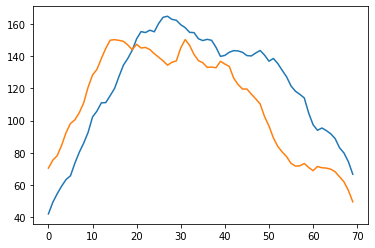

In [ ]:
y_hat = sun_tr[min_pos+sun_val.shape[0]:min_pos+sun_val.shape[0]+sun_te.shape[0]].to_numpy()
y = sun_te.to_numpy()

import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(y_hat)